<a href="https://colab.research.google.com/github/lungnahahd/Tensorflow_Prac/blob/main/CitrusLeaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import numpy as np
import tensorflow as tf
from tensorflow import keras
from functools import partial
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load("citrus_leaves",as_supervised=True, split=["train[:20%]", "train[20%:35%]","train[35%:]"])

# Central Augmentation 진행
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

# Random Augmentation 진행
def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    return resized_image, label


def origin_preprocess(image, label):
  resized_image = tf.image.resize(image, [224, 224])
  return resized_image, label

In [79]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(origin_preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(origin_preprocess).batch(batch_size).prefetch(1)

In [86]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(partial(preprocess, randomize=False)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(origin_preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(origin_preprocess).batch(batch_size).prefetch(1)

In [39]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=4, activation='softmax'),
])

In [35]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_set, epochs=10, validation_data=valid_set, callbacks=early_stopping)

Epoch 1/10
13/13 [==============================] - 322s 24s/step - loss: 63.6322 - accuracy: 0.2409 - val_loss: 1.4086 - val_accuracy: 0.2360
Epoch 2/10
13/13 [==============================] - 304s 23s/step - loss: 1.3907 - accuracy: 0.2927 - val_loss: 1.4230 - val_accuracy: 0.2472
Epoch 3/10
13/13 [==============================] - 313s 24s/step - loss: 1.3611 - accuracy: 0.3187 - val_loss: 1.3800 - val_accuracy: 0.3258
Epoch 4/10
13/13 [==============================] - 307s 24s/step - loss: 1.3659 - accuracy: 0.3653 - val_loss: 1.3746 - val_accuracy: 0.3258
Epoch 5/10
13/13 [==============================] - 303s 23s/step - loss: 1.4230 - accuracy: 0.3316 - val_loss: 1.5185 - val_accuracy: 0.2472
Epoch 6/10
13/13 [==============================] - 304s 23s/step - loss: 1.3397 - accuracy: 0.3316 - val_loss: 1.4272 - val_accuracy: 0.2472
Epoch 7/10
13/13 [==============================] - 295s 23s/step - loss: 1.3380 - accuracy: 0.3238 - val_loss: 1.3738 - val_accuracy: 0.3258
Epoch

In [36]:
model.evaluate(test_set)

4/4 [==============================] - 26s 6s/step - loss: 1.3136 - accuracy: 0.3025


[1.3135733604431152, 0.3025210201740265]

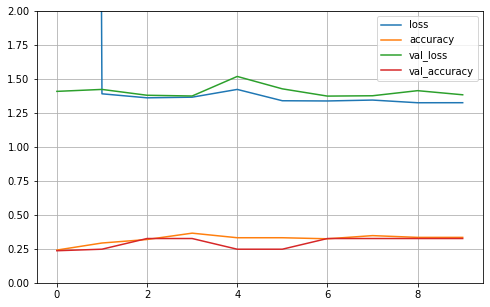

In [37]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [40]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_set, epochs=10, validation_data=valid_set, callbacks=early_stopping)

Epoch 1/10
13/13 [==============================] - 295s 22s/step - loss: 66.0689 - accuracy: 0.2850 - val_loss: 1.3783 - val_accuracy: 0.3258
Epoch 2/10
13/13 [==============================] - 287s 22s/step - loss: 1.3510 - accuracy: 0.3212 - val_loss: 1.3796 - val_accuracy: 0.3258
Epoch 3/10
13/13 [==============================] - 287s 22s/step - loss: 1.3495 - accuracy: 0.3420 - val_loss: 1.3758 - val_accuracy: 0.3483
Epoch 4/10
13/13 [==============================] - 298s 22s/step - loss: 1.3570 - accuracy: 0.3109 - val_loss: 1.4111 - val_accuracy: 0.2809
Epoch 5/10
13/13 [==============================] - 291s 22s/step - loss: 1.3571 - accuracy: 0.3161 - val_loss: 1.3752 - val_accuracy: 0.3258
Epoch 6/10
13/13 [==============================] - 334s 26s/step - loss: 1.3322 - accuracy: 0.3264 - val_loss: 1.3951 - val_accuracy: 0.2472
Epoch 7/10
13/13 [==============================] - 343s 26s/step - loss: 1.3293 - accuracy: 0.3187 - val_loss: 1.3841 - val_accuracy: 0.3371
Epoch

In [42]:
model.evaluate(test_set)

4/4 [==============================] - 24s 6s/step - loss: 1.3337 - accuracy: 0.3025


[1.3337483406066895, 0.3025210201740265]

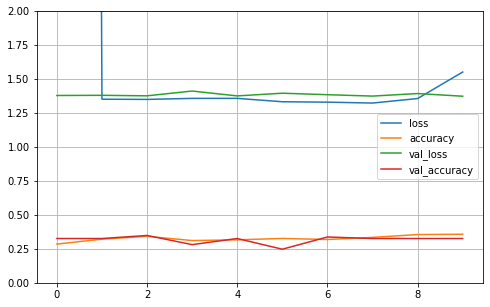

In [43]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [45]:
# train_set =train_set / 255.
# valid_set = valid_set / 255.
# test_set = test_set / 255.

TypeError: ignored

In [46]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation="softmax")
])

In [47]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_set, epochs=10, validation_data=valid_set, callbacks=early_stopping)

Epoch 1/10
13/13 [==============================] - 152s 11s/step - loss: 13.3641 - accuracy: 0.3523 - val_loss: 383.2507 - val_accuracy: 0.2472
Epoch 2/10
13/13 [==============================] - 92s 7s/step - loss: 0.9819 - accuracy: 0.5751 - val_loss: 218.2049 - val_accuracy: 0.2472
Epoch 3/10
13/13 [==============================] - 95s 7s/step - loss: 0.9190 - accuracy: 0.6269 - val_loss: 215.3218 - val_accuracy: 0.2360
Epoch 4/10
13/13 [==============================] - 92s 7s/step - loss: 1.0422 - accuracy: 0.5052 - val_loss: 120.3661 - val_accuracy: 0.4045
Epoch 5/10
13/13 [==============================] - 96s 7s/step - loss: 0.9083 - accuracy: 0.5725 - val_loss: 258.3705 - val_accuracy: 0.2472
Epoch 6/10
13/13 [==============================] - 99s 8s/step - loss: 0.7832 - accuracy: 0.6528 - val_loss: 139.0427 - val_accuracy: 0.3258
Epoch 7/10
13/13 [==============================] - 94s 7s/step - loss: 0.8978 - accuracy: 0.5959 - val_loss: 102.5769 - val_accuracy: 0.5056
Epo

In [48]:
model.evaluate(test_set)

4/4 [==============================] - 10s 2s/step - loss: 173.4227 - accuracy: 0.3445


[173.4226837158203, 0.3445378243923187]

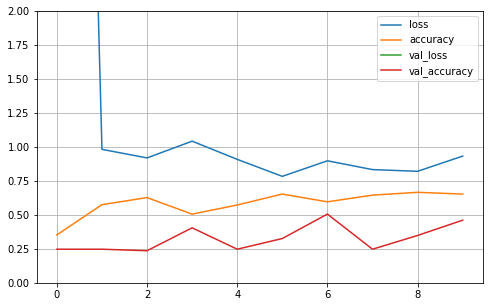

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [51]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_set, epochs=10, validation_data=valid_set, callbacks=early_stopping)

Epoch 1/10
13/13 [==============================] - 114s 8s/step - loss: 0.9205 - accuracy: 0.6813 - val_loss: 391.3958 - val_accuracy: 0.2472
Epoch 2/10
13/13 [==============================] - 104s 8s/step - loss: 0.5174 - accuracy: 0.8212 - val_loss: 283.8832 - val_accuracy: 0.4045
Epoch 3/10
13/13 [==============================] - 103s 8s/step - loss: 0.8507 - accuracy: 0.7254 - val_loss: 184.9594 - val_accuracy: 0.3146
Epoch 4/10
13/13 [==============================] - 111s 9s/step - loss: 0.3794 - accuracy: 0.8834 - val_loss: 193.3734 - val_accuracy: 0.3708
Epoch 5/10
13/13 [==============================] - 135s 10s/step - loss: 0.2991 - accuracy: 0.9223 - val_loss: 350.1707 - val_accuracy: 0.3483
Epoch 6/10
13/13 [==============================] - 104s 8s/step - loss: 0.2100 - accuracy: 0.9223 - val_loss: 366.8637 - val_accuracy: 0.3596
Epoch 7/10
13/13 [==============================] - 102s 8s/step - loss: 0.2164 - accuracy: 0.9352 - val_loss: 373.4806 - val_accuracy: 0.280

In [52]:
model.evaluate(test_set)

4/4 [==============================] - 7s 1s/step - loss: 206.7717 - accuracy: 0.3193


[206.771728515625, 0.3193277418613434]

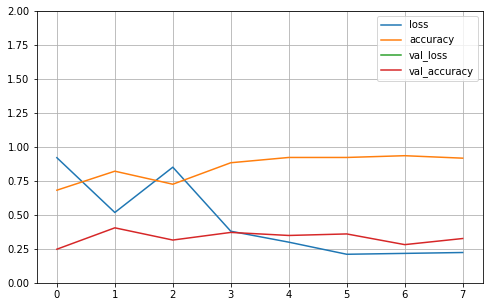

In [53]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [68]:
def origin_preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [58]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(origin_preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(origin_preprocess).batch(batch_size).prefetch(1)

In [59]:
base_model = keras.applications.xception.Xception(weights=None,include_top=False) # 여기를 NONE으로 해야되는지는 고민해보기
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(4, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [60]:
for layer in base_model.layers:
    layer.trainable = False


optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set,epochs=5)

Epoch 1/5
13/13 [==============================] - 97s 7s/step - loss: 1.3392 - accuracy: 0.3187 - val_loss: 1.4576 - val_accuracy: 0.3258
Epoch 2/5
13/13 [==============================] - 88s 7s/step - loss: 1.3072 - accuracy: 0.3083 - val_loss: 1.4326 - val_accuracy: 0.3258
Epoch 3/5
13/13 [==============================] - 87s 7s/step - loss: 1.3209 - accuracy: 0.2772 - val_loss: 1.4312 - val_accuracy: 0.3258
Epoch 4/5
13/13 [==============================] - 90s 7s/step - loss: 1.3038 - accuracy: 0.3601 - val_loss: 1.3873 - val_accuracy: 0.3258
Epoch 5/5
13/13 [==============================] - 85s 7s/step - loss: 1.3037 - accuracy: 0.3601 - val_loss: 1.4002 - val_accuracy: 0.3258


In [62]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_set, validation_data=valid_set, epochs=10, callbacks=early_stopping)

Epoch 1/10
13/13 [==============================] - 414s 29s/step - loss: 0.8341 - accuracy: 0.6295 - val_loss: 1.3985 - val_accuracy: 0.3258
Epoch 2/10
13/13 [==============================] - 357s 27s/step - loss: 1.0183 - accuracy: 0.6451 - val_loss: 1.4020 - val_accuracy: 0.3258
Epoch 3/10
13/13 [==============================] - 354s 27s/step - loss: 0.5508 - accuracy: 0.8005 - val_loss: 1.4002 - val_accuracy: 0.3258
Epoch 4/10
13/13 [==============================] - 321s 25s/step - loss: 0.7281 - accuracy: 0.7746 - val_loss: 1.4031 - val_accuracy: 0.3258
Epoch 5/10
13/13 [==============================] - 322s 25s/step - loss: 0.4908 - accuracy: 0.8161 - val_loss: 1.4026 - val_accuracy: 0.3258
Epoch 6/10
13/13 [==============================] - 325s 25s/step - loss: 0.5447 - accuracy: 0.8083 - val_loss: 1.4039 - val_accuracy: 0.3258


In [63]:
model.evaluate(test_set)

4/4 [==============================] - 20s 5s/step - loss: 1.3050 - accuracy: 0.3025


[1.3050349950790405, 0.3025210201740265]

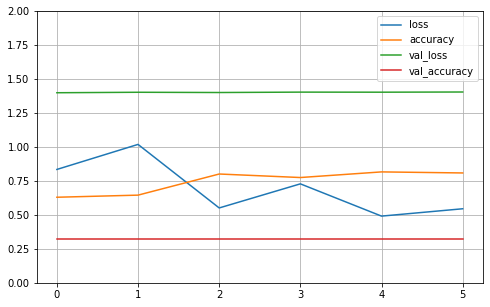

In [64]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [69]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(partial(preprocess, randomize=False)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(origin_preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(origin_preprocess).batch(batch_size).prefetch(1)

In [70]:
base_model = keras.applications.xception.Xception(weights=None,include_top=False) # 여기를 NONE으로 해야되는지는 고민해보기
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(4, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [71]:
for layer in base_model.layers:
    layer.trainable = False


optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set,epochs=5)

Epoch 1/5
13/13 [==============================] - 92s 7s/step - loss: 1.3377 - accuracy: 0.3342 - val_loss: 1.4644 - val_accuracy: 0.3258
Epoch 2/5
13/13 [==============================] - 81s 6s/step - loss: 1.3189 - accuracy: 0.2694 - val_loss: 1.4900 - val_accuracy: 0.3258
Epoch 3/5
13/13 [==============================] - 81s 6s/step - loss: 1.2943 - accuracy: 0.3601 - val_loss: 1.3893 - val_accuracy: 0.3258
Epoch 4/5
13/13 [==============================] - 81s 6s/step - loss: 1.3090 - accuracy: 0.3601 - val_loss: 1.4240 - val_accuracy: 0.3258
Epoch 5/5
13/13 [==============================] - 83s 6s/step - loss: 1.2929 - accuracy: 0.3601 - val_loss: 1.4491 - val_accuracy: 0.3258


In [72]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_set, validation_data=valid_set, epochs=10, callbacks=early_stopping)

Epoch 1/10
13/13 [==============================] - 338s 25s/step - loss: 0.8275 - accuracy: 0.6192 - val_loss: 1.4466 - val_accuracy: 0.3258
Epoch 2/10
13/13 [==============================] - 334s 26s/step - loss: 0.8265 - accuracy: 0.6839 - val_loss: 1.4493 - val_accuracy: 0.3258
Epoch 3/10
13/13 [==============================] - 331s 25s/step - loss: 0.8141 - accuracy: 0.6632 - val_loss: 1.4511 - val_accuracy: 0.3258
Epoch 4/10
13/13 [==============================] - 330s 25s/step - loss: 1.0386 - accuracy: 0.6295 - val_loss: 1.4499 - val_accuracy: 0.3258
Epoch 5/10
13/13 [==============================] - 332s 26s/step - loss: 0.7476 - accuracy: 0.6943 - val_loss: 1.4470 - val_accuracy: 0.3258
Epoch 6/10
13/13 [==============================] - 318s 24s/step - loss: 0.4346 - accuracy: 0.7953 - val_loss: 1.4489 - val_accuracy: 0.3258


In [73]:
model.evaluate(test_set)

4/4 [==============================] - 21s 5s/step - loss: 1.2990 - accuracy: 0.3025


[1.299006462097168, 0.3025210201740265]

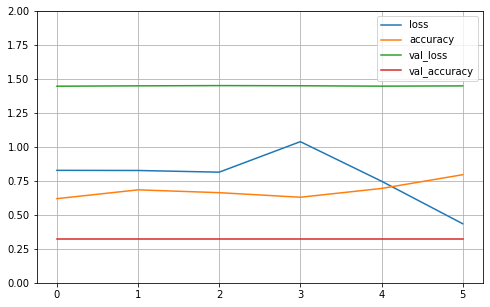

In [76]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [77]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [80]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [82]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_set, epochs=10, validation_data=valid_set, callbacks=early_stopping)

Epoch 1/10
13/13 [==============================] - 230s 17s/step - loss: 3.1943 - accuracy: 0.3679 - val_loss: 196695.1875 - val_accuracy: 0.3258
Epoch 2/10
13/13 [==============================] - 204s 16s/step - loss: 0.8499 - accuracy: 0.6528 - val_loss: 297397.0000 - val_accuracy: 0.2360
Epoch 3/10
13/13 [==============================] - 201s 15s/step - loss: 0.9453 - accuracy: 0.5959 - val_loss: 23440.8281 - val_accuracy: 0.2360
Epoch 4/10
13/13 [==============================] - 202s 16s/step - loss: 0.8010 - accuracy: 0.7098 - val_loss: 9294.6016 - val_accuracy: 0.2360
Epoch 5/10
13/13 [==============================] - 211s 16s/step - loss: 0.5099 - accuracy: 0.7927 - val_loss: 646.4887 - val_accuracy: 0.1910
Epoch 6/10
13/13 [==============================] - 205s 16s/step - loss: 0.7037 - accuracy: 0.6503 - val_loss: 3536.6580 - val_accuracy: 0.2472
Epoch 7/10
13/13 [==============================] - 205s 16s/step - loss: 1.2534 - accuracy: 0.5699 - val_loss: 4166.0918 - va

In [83]:
model.evaluate(test_set)

4/4 [==============================] - 14s 3s/step - loss: 414.9820 - accuracy: 0.3277


[414.9819641113281, 0.32773110270500183]

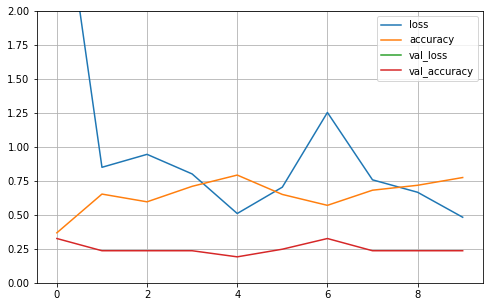

In [84]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [87]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_set, epochs=10, validation_data=valid_set, callbacks=early_stopping)

Epoch 1/10
13/13 [==============================] - 219s 16s/step - loss: 0.8931 - accuracy: 0.6244 - val_loss: 270666.4375 - val_accuracy: 0.2360
Epoch 2/10
13/13 [==============================] - 205s 16s/step - loss: 1.0781 - accuracy: 0.5363 - val_loss: 3101800.2500 - val_accuracy: 0.2360
Epoch 3/10
13/13 [==============================] - 205s 16s/step - loss: 0.7048 - accuracy: 0.7228 - val_loss: 2724968.2500 - val_accuracy: 0.2360
Epoch 4/10
13/13 [==============================] - 209s 16s/step - loss: 0.5519 - accuracy: 0.7824 - val_loss: 1525882.7500 - val_accuracy: 0.2360
Epoch 5/10
13/13 [==============================] - 201s 15s/step - loss: 0.5431 - accuracy: 0.7409 - val_loss: 30840.1992 - val_accuracy: 0.2360
Epoch 6/10
13/13 [==============================] - 199s 15s/step - loss: 0.5865 - accuracy: 0.7358 - val_loss: 3731.3933 - val_accuracy: 0.2360
Epoch 7/10
13/13 [==============================] - 199s 15s/step - loss: 0.7650 - accuracy: 0.7021 - val_loss: 11993.

In [88]:
model.evaluate(test_set)

4/4 [==============================] - 15s 4s/step - loss: 3168.9148 - accuracy: 0.3277


[3168.914794921875, 0.32773110270500183]

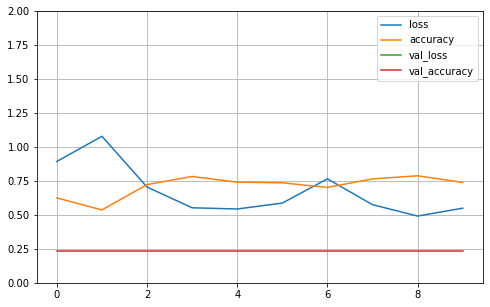

In [89]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
#save_fig("keras_learning_curves_plot")
plt.show()